In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [53]:
symbol ="AAPL TSLA MSFT SPY AMZN BABA GOOGL NFLX AAL PYPL COST"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-09-20",end="2021-02-10")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2019-09-19,18158.0,54.780709,55.212519,54.376041,54.521626
2019-09-20,18159.0,54.625260,54.916422,53.660471,53.724625
2019-09-23,18162.0,54.025658,54.245264,53.704883,53.968906
2019-09-24,18163.0,54.538894,54.899149,53.591380,53.712284
2019-09-25,18164.0,53.926962,54.654871,53.579046,54.538898
...,...,...,...,...,...
2021-02-03,18661.0,135.557435,135.567429,133.410649,133.740158
2021-02-04,18662.0,136.096628,137.194977,134.389172,137.184998
2021-02-05,18663.0,137.350006,137.419998,135.860001,136.759995


In [54]:
for i in range(len(num_name)):
    df[i]['12EMA'] = talib.EMA(df[i]['Close'], timeperiod = 12)
    df[i]['26EMA'] = talib.EMA(df[i]['Close'], timeperiod = 26)
    #data_frames_separate[0][['Close','12EMA','26EMA']].plot(figsize=(12,10))
df[5]

,Date,Open,High,Low,Close,12EMA,26EMA
Date,,,,,,,
2019-09-19,18158.0,180.899994,184.130005,180.429993,180.460007,NaN,NaN
2019-09-20,18159.0,182.309998,183.820007,178.839996,182.509995,NaN,NaN
2019-09-23,18162.0,181.250000,181.330002,176.800003,176.979996,NaN,NaN
2019-09-24,18163.0,179.169998,179.490005,171.300003,171.550003,NaN,NaN
2019-09-25,18164.0,172.300003,176.990005,171.720001,176.660004,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-03,18661.0,264.700012,268.279999,261.250000,263.429993,257.010972,253.538663
2021-02-04,18662.0,269.579987,269.989990,265.558014,266.959991,258.541591,254.532835
2021-02-05,18663.0,264.609985,266.450012,263.209991,265.670013,259.638271,255.357812


In [61]:
for i in range(len(num_name)):
    df[i]["MACDLine"]= df[i]['12EMA']-df[i]['26EMA']
    df[i]['SignalLine'] = talib.EMA(df[i]["MACDLine"], timeperiod = 9)
    df[i]['Histogram'] = df[i]["MACDLine"]- df[i]['SignalLine']
    df[i]['BullishDivergence'] = 0.0
    df[i]['BearishDivergence'] = 0.0

In [66]:
df[5]

,Date,Open,High,Low,Close,12EMA,26EMA,MACDLine,SignalLine,Histogram,BullishDivergence,BearishDivergence
Date,,,,,,,,,,,,
2019-09-19,18158.0,180.899994,184.130005,180.429993,180.460007,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-09-20,18159.0,182.309998,183.820007,178.839996,182.509995,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-09-23,18162.0,181.250000,181.330002,176.800003,176.979996,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-09-24,18163.0,179.169998,179.490005,171.300003,171.550003,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-09-25,18164.0,172.300003,176.990005,171.720001,176.660004,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-03,18661.0,264.700012,268.279999,261.250000,263.429993,257.010972,253.538663,3.472309,1.776505,1.695804,0.0,0.0
2021-02-04,18662.0,269.579987,269.989990,265.558014,266.959991,258.541591,254.532835,4.008755,2.222955,1.785800,0.0,0.0
2021-02-05,18663.0,264.609985,266.450012,263.209991,265.670013,259.638271,255.357812,4.280459,2.634456,1.646003,0.0,0.0


In [63]:
# df[0]['Signal'] = 0.0
# df[0]['Signal'] = np.where(df[0]['MACDLine'] > df[0]['SignalLine'], 1.0, 0.0)
# df[0]['Position'] = df[0]['Signal'].diff()
# df[0]

In [67]:
lower_barrier = 0 # these are rules which can be modified according to ur rules!
upper_barrier = 0
width = 20
df[0]["Histogram"]


Date
2019-09-19         NaN
2019-09-20         NaN
2019-09-23         NaN
2019-09-24         NaN
2019-09-25         NaN
                ...   
2021-02-03   -0.498420
2021-02-04   -0.378173
2021-02-05   -0.332448
2021-02-08   -0.298376
2021-02-09   -0.339722
Name: Histogram, Length: 351, dtype: float64

In [68]:
# Bullish Divergence
for f in range(len(num_name)):
    for i in range(len(df[f]['Histogram'])):
        try:
            if df[f]["Histogram"][i] < lower_barrier:

                for a in range(i + 1, i + width):
                    if df[f]["Histogram"][a] > lower_barrier:

                        for r in range(a + 1, a + width):
                            if df[f]["Histogram"][r] < lower_barrier and df[f]["Histogram"][r] > df[f]["Histogram"][i] and df[f]["Close"][r] < df[f]["Close"][i]:

                                for s in range(r + 1, r + width): 
                                    if df[f]["Histogram"][s] > lower_barrier:
                                        df[f]["BullishDivergence"][s+1] = 1
                                        break

                                    else:
                                        continue
                            else:
                                continue
                        else:
                            continue
                    else:
                        continue

        except IndexError:
            pass

In [72]:
for i in df[1]['BullishDivergence']:
    if i==1:
        print(i)

1.0
1.0


In [73]:
# Bearish Divergence
for f in range(len(num_name)):
    for i in range(len(df[f]['Histogram'])):

        try:
            if df[f]["Histogram"][i] > upper_barrier:

                for a in range(i + 1, i + width): 
                    if df[f]["Histogram"][a] < upper_barrier:

                        for r in range(a + 1, a + width):
                            if df[f]["Histogram"][r] > upper_barrier and df[f]["Histogram"][r] < df[f]["Histogram"][i] and df[f]["Close"][r] > df[f]["Close"][i]:

                                for s in range(r + 1, r + width):
                                    if df[f]["Histogram"][s] < upper_barrier:
                                        # do u need to have different columns! I think not but just to be on the same page!
                                        df[f]["BearishDivergence"][s+1] = -1
                                        break
                                    else:
                                        continue
                            else:
                                continue
                        else:
                            continue
                    else:
                        continue
        except IndexError:
            pass

In [82]:
for i in df[4]["BearishDivergence"]:
    if i == -1:
        print(i)

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


In [84]:
def plotMACDDivergence(num):
    
  fig = plt.figure(figsize=(16,12))
  gs = gridspec.GridSpec(2, 1, height_ratios = [1,1]) 
  ax_stock= plt.subplot(gs[0])    
  plt.title(num_name[num])

  candlestick_ohlc(ax_stock,df[num].values,width=0.6, \
                    colorup='green', colordown='red', alpha=0.8)
  #ax_stock.plot(data.index,df[num]["Close"])

 # plot ‘buy’ signals
  plt.plot(df[num][df[num]['BullishDivergence'] == 1].index, 
         df[num]['Close'][df[num]['BullishDivergence'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(df[num][df[num]['BearishDivergence'] == -1].index, 
         df[num]['Close'][df[num]['BearishDivergence'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
    
    
  ax_MACD= plt.subplot(gs[1],sharex=ax_stock)
 
  ax_MACD.plot(data.index,df[num]["MACDLine"] )
  ax_MACD.plot(data.index,df[num]["SignalLine"] )
  ax_MACD.plot(data.index,df[num]['Histogram'])
  plt.fill_between(data.index,df[num]['Histogram'])

  

  legend_labels= ["MACDLine", "SignalLine"]
# plot ‘buy’ signals
  plt.plot(df[num][df[num]['BullishDivergence'] == 1].index, 
         df[num]['Histogram'][df[num]['BullishDivergence'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(df[num][df[num]['BearishDivergence'] == -1].index, 
         df[num]['Histogram'][df[num]['BearishDivergence'] == -1], 
         'v', markersize =15, color = 'r', label = 'sell')

    
    
  ax_MACD.legend(legend_labels,loc = 2)
    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_MACD.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_stock.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_stock.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_MACD.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_stock.set_ylabel("Price ($)")
  ax_MACD.set_ylabel("MACD")


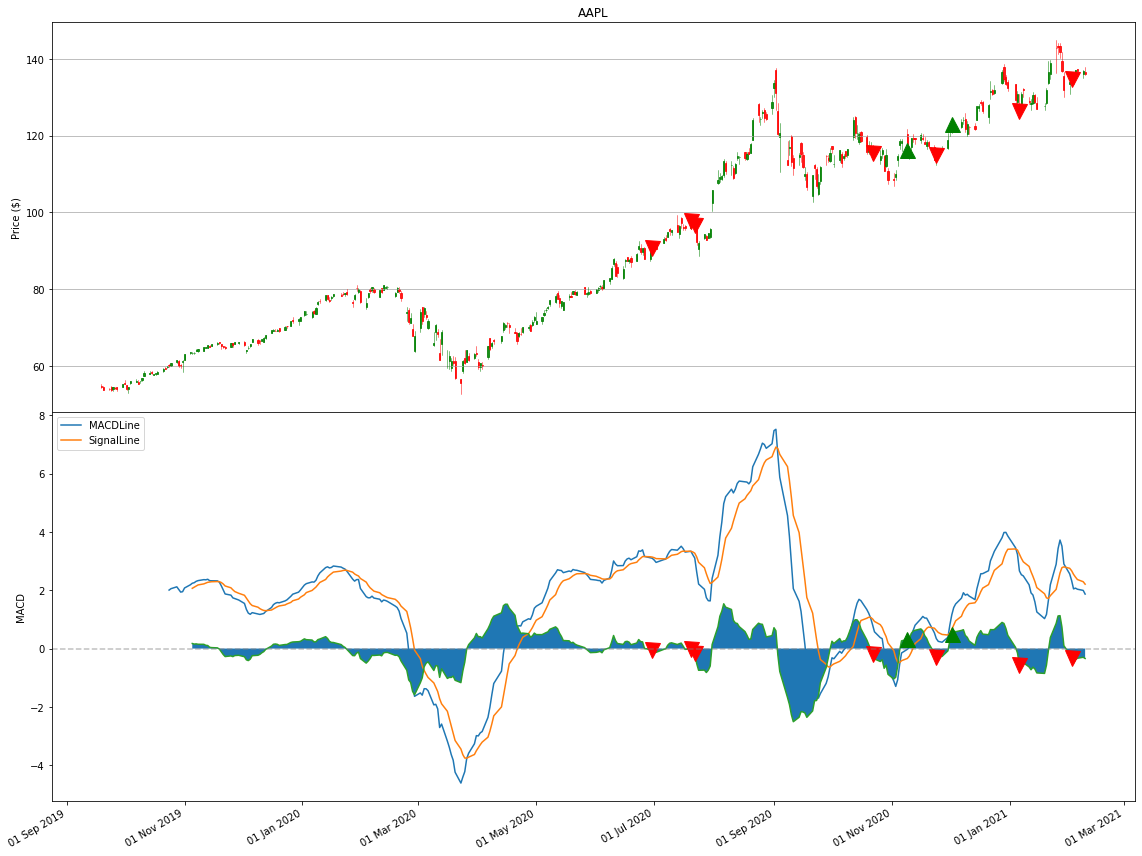

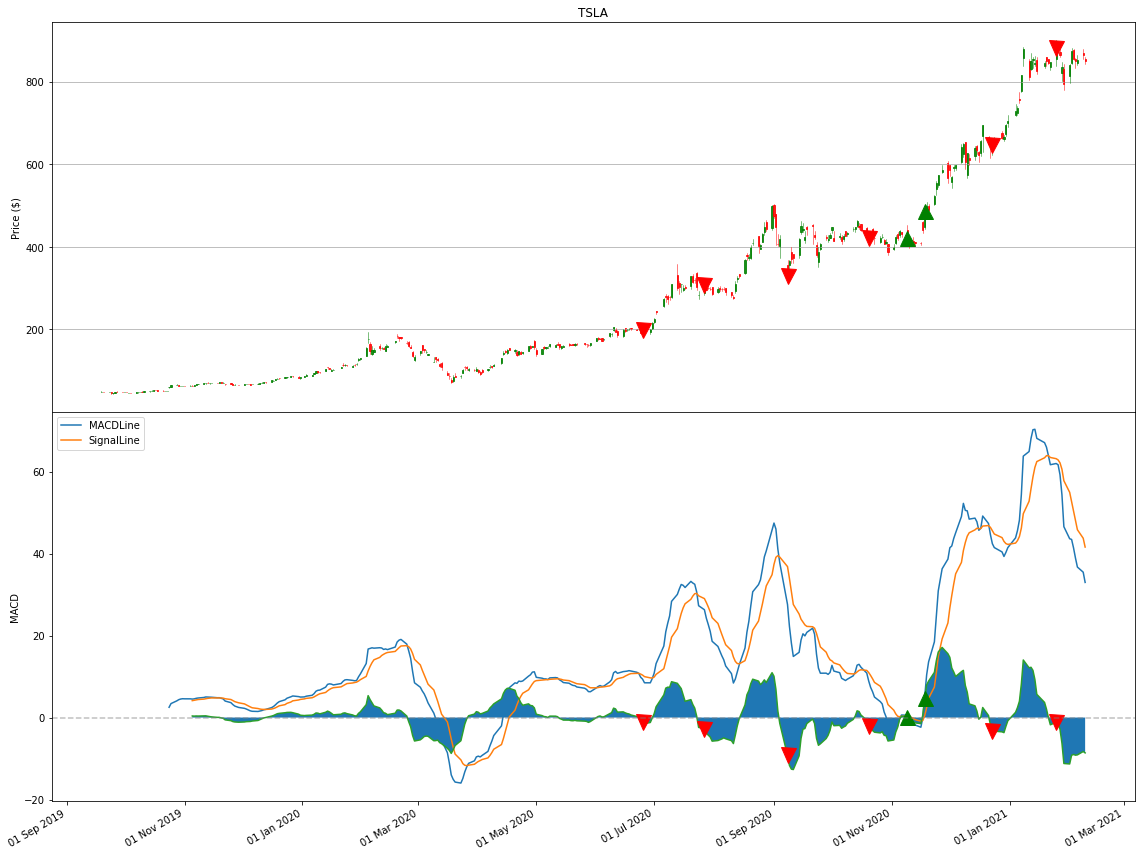

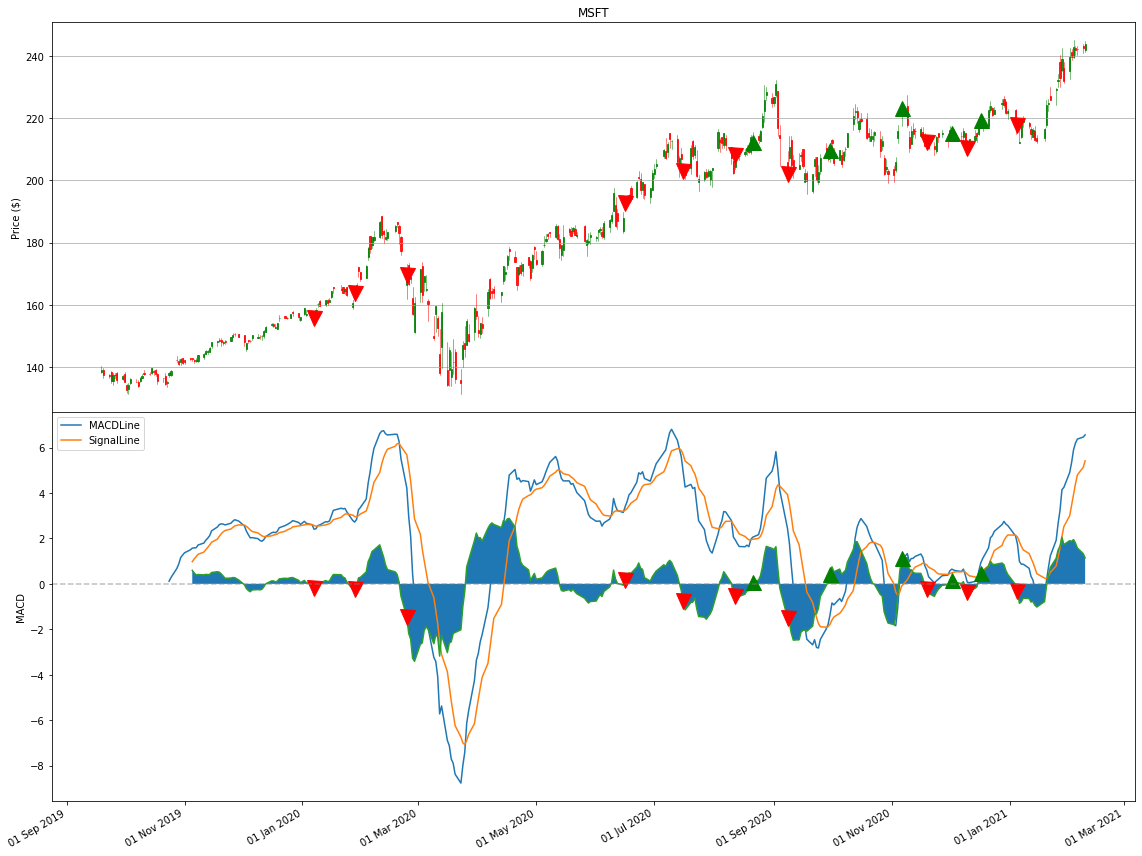

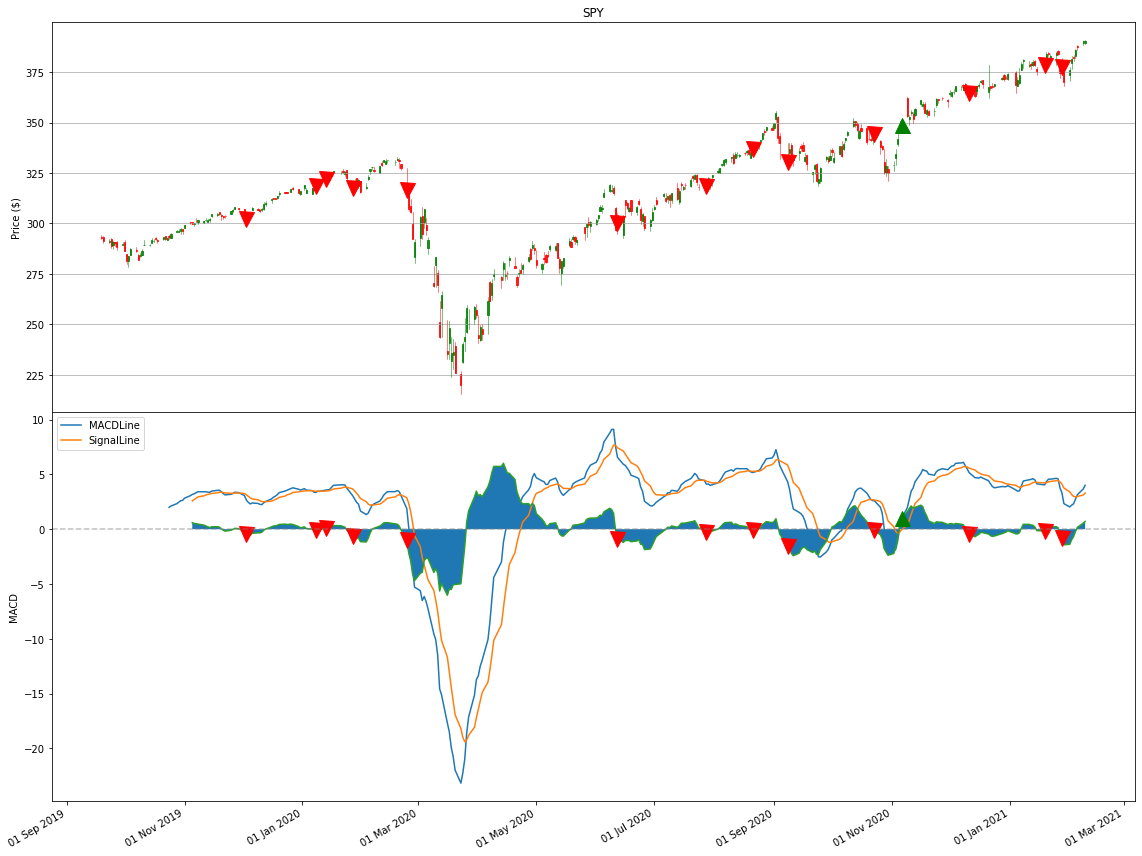

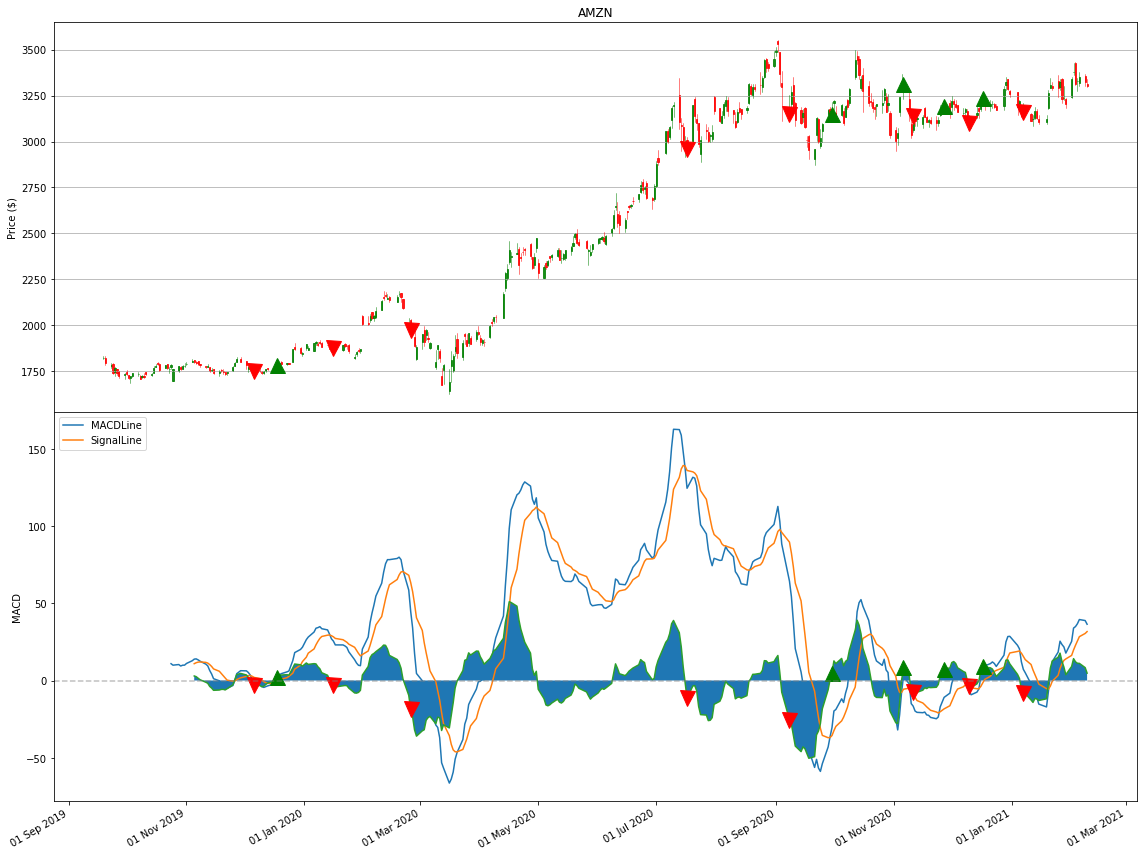

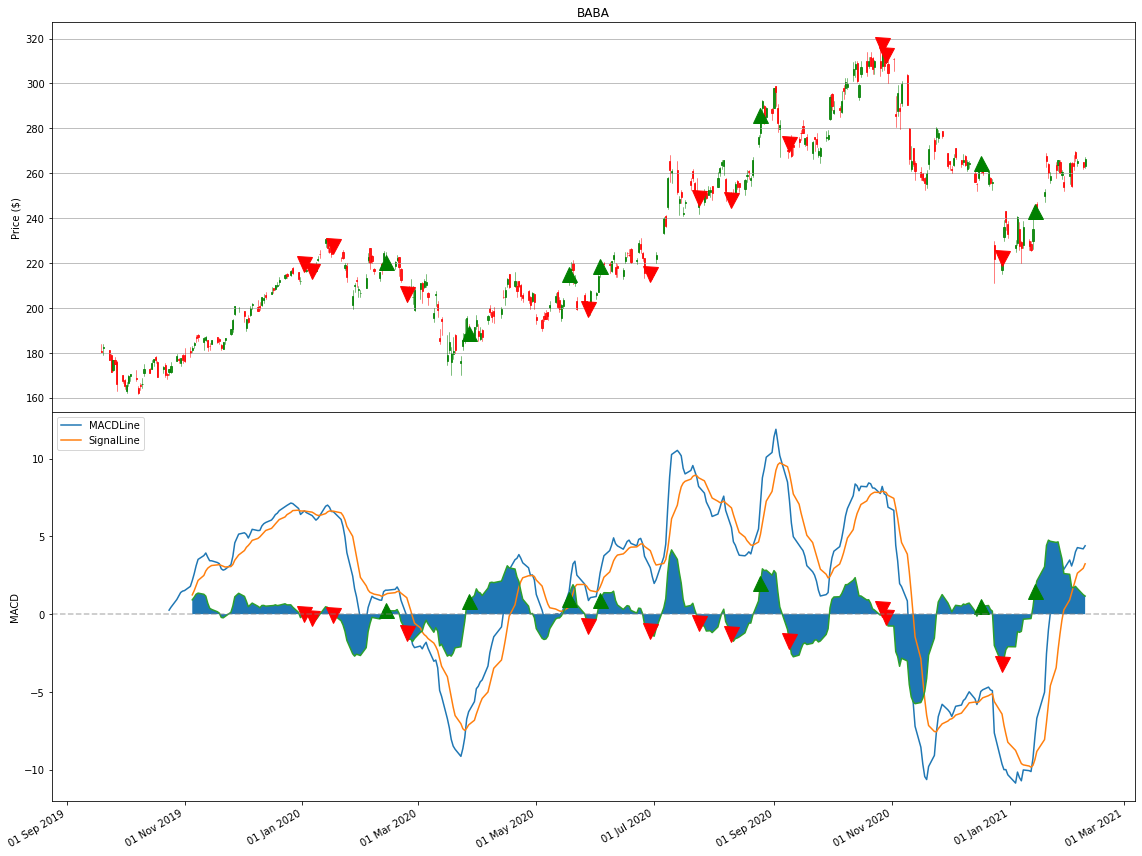

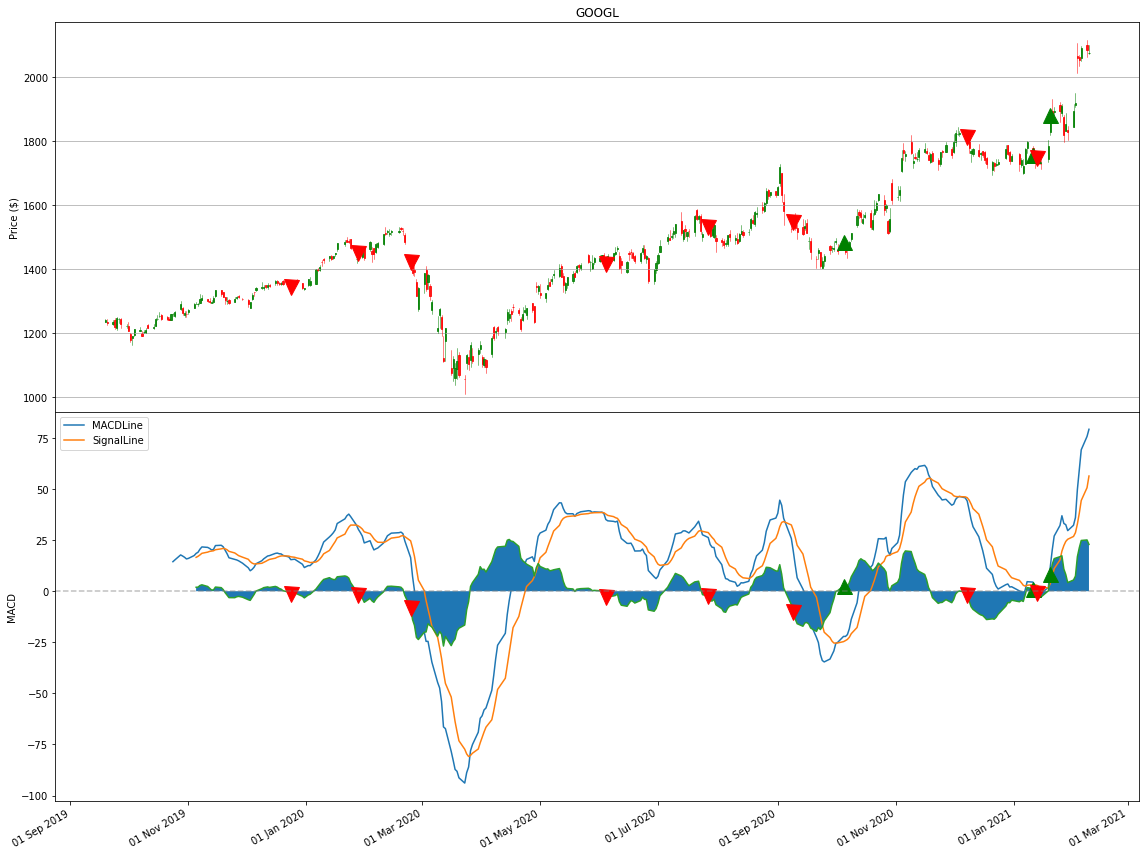

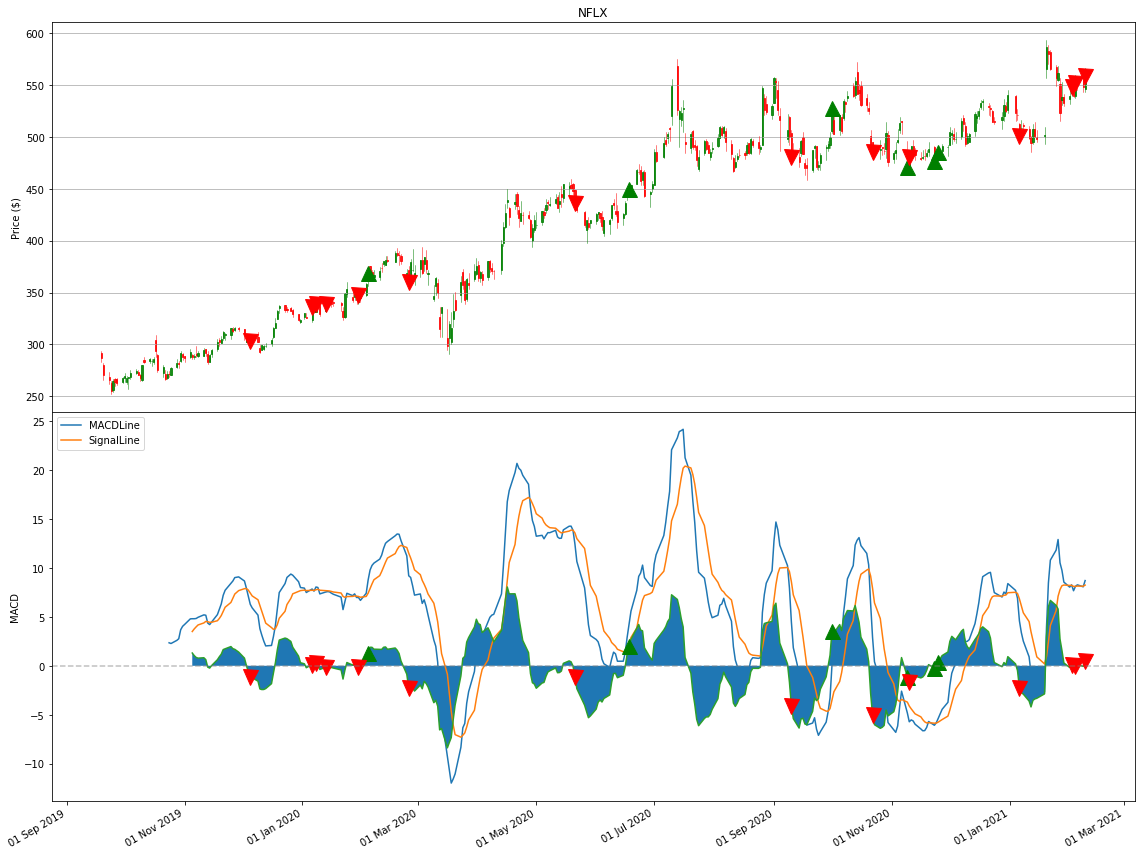

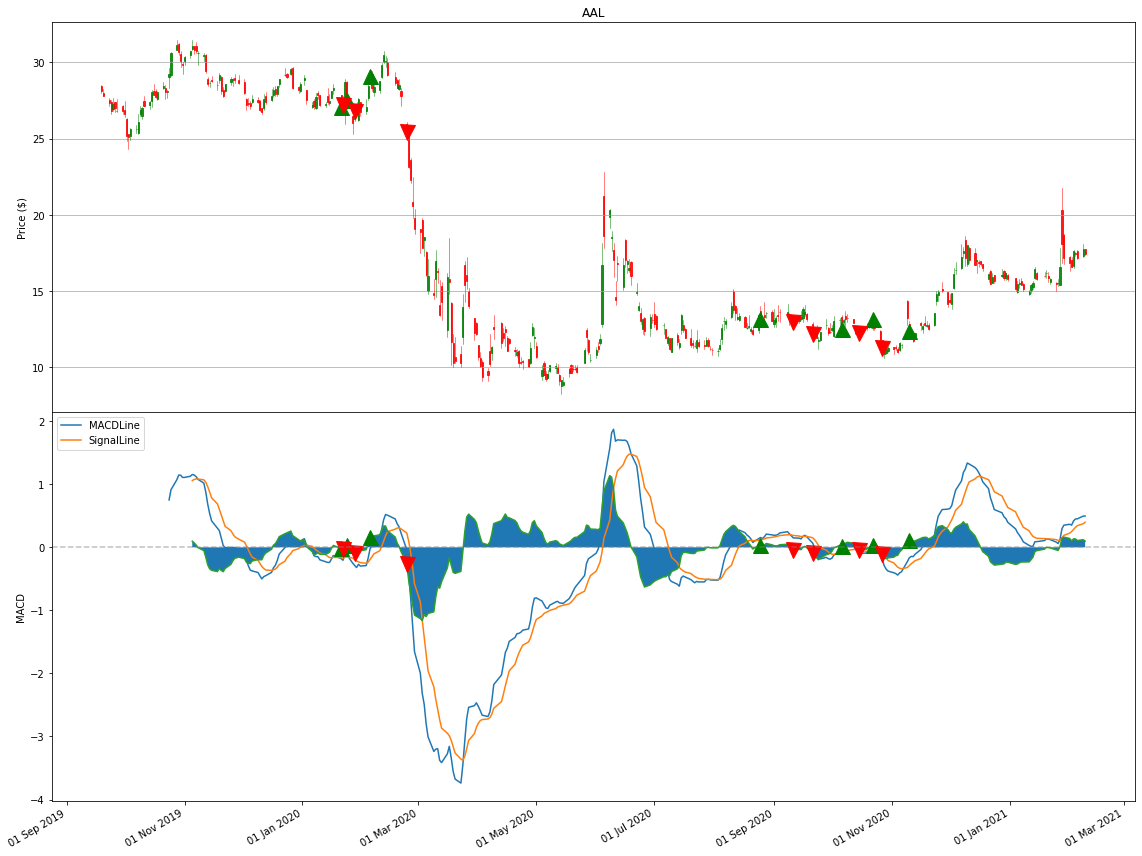

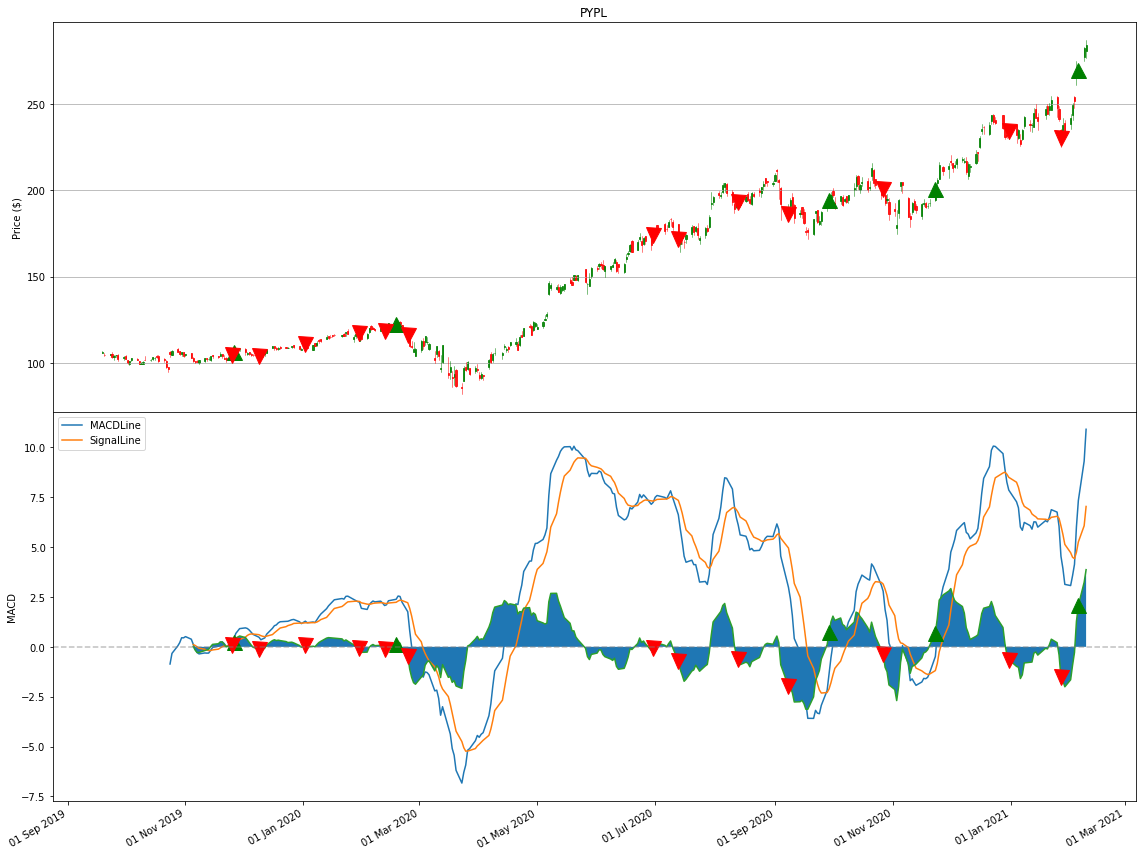

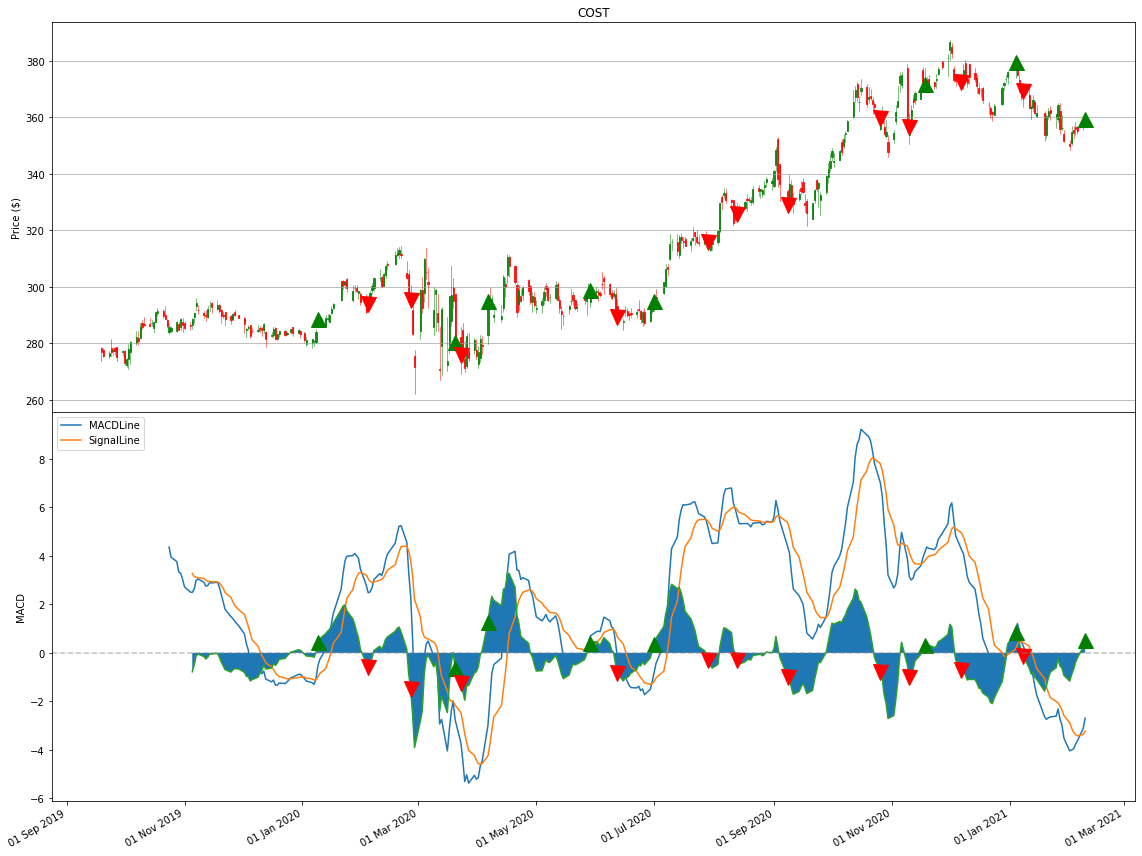

In [85]:
for i in range(len(num_name)):
    plotMACDDivergence(i)